# <font color="#008080">Data Cleaning</font>

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = "{:.2f}".format

In [87]:
df = pd.read_csv("istanbul_house_price_data_2025.csv")

In [88]:
df.head()

,area_type,availability,location,size,society,bath,balcony,price,total_squaremeter
0,Built-up Area,12-Dec,Beşiktaş,3+1,Yakamoz Sitesi,2,1,13544775,202.53
1,Plot Area,05-May,Şişli,1+1,Mavi Apartman,2,2,20342338,226.68
2,Built-up Area,30-Jan,Fatih,4+1,Kule Evleri,2,1,7550492,78.97
3,Built-up Area,06-Jun,Ataşehir,1+1,Kule Evleri,1,1,13241066,192.31
4,Plot Area,29-Jan,Maltepe,3+1,Mavi Apartman,1,1,8103845,140.28


In [89]:
df.shape

(15000, 9)

In [90]:
df["area_type"].unique()

array(['Built-up Area', 'Plot Area', 'Super built-up Area'], dtype=object)

In [91]:
df = df.drop(["area_type","availability","society"],axis=1)
df.head()

,location,size,bath,balcony,price,total_squaremeter
0,Beşiktaş,3+1,2,1,13544775,202.53
1,Şişli,1+1,2,2,20342338,226.68
2,Fatih,4+1,2,1,7550492,78.97
3,Ataşehir,1+1,1,1,13241066,192.31
4,Maltepe,3+1,1,1,8103845,140.28


In [92]:
def extract_counts(size_str):
    parts = size_str.split("+")
    if len(parts) == 2:
        try:
            room_count = int(parts[0].strip())
            living_room_count = int(parts[1].strip())
            return room_count, living_room_count
        except ValueError:
            return np.nan, np.nan
    else:
        return np.nan, np.nan

df[["room", "living_room"]] = df["size"].apply(extract_counts).apply(pd.Series)

df = df.drop("size",axis=1)

df.head()

,location,bath,balcony,price,total_squaremeter,room,living_room
0,Beşiktaş,2,1,13544775,202.53,3,1
1,Şişli,2,2,20342338,226.68,1,1
2,Fatih,2,1,7550492,78.97,4,1
3,Ataşehir,1,1,13241066,192.31,1,1
4,Maltepe,1,1,8103845,140.28,3,1


In [93]:
print(df.living_room.unique())
print(df.room.unique())

[1]
[3 1 4 2 5]


In [94]:
for item in df.total_squaremeter.unique():
    if not str(item).isdigit():
      print(item)  ## clean

202.52854
226.68332
78.96755
192.30921
140.28353
173.72861
136.56741
73.39337
88.25785
97.54815
91.97397
130.0642
151.43189
117.98681
110.55457
172.79958
107.76748
157.9351
196.02533
106.83845
228.54138
117.05778
81.75464
194.16727
149.57383000000002
92.903
55.7418
175.58667
208.10272
176.5157
80.82561
196.95436
157.00607
104.98039
79.89658
193.23824
89.18688
61.31598
75.25143
209.03175
124.49002
68.74822
109.62554
150.50286
178.37376
102.1933
143.07062
62.24501
82.68367
69.67725
221.10914
95.69009
58.52889
167.2254
120.7739
144.92868
211.81884
169.08346
122.63196
141.21256
57.59986
132.85129
114.27069
160.72219
138.42547
162.58025
197.88339
186.73503
225.75429
65.0321
135.63838
66.89016000000001
105.90942
134.70935
209.96078
158.86413000000002
84.54173
139.3545
227.61235
147.71577
201.59951
179.30279000000002
72.46434
215.53496
60.38695
191.38018
148.6448
222.9672
56.67083
128.20614
174.65764
98.47718
119.84487
185.806
163.50928
165.36734
108.69651
203.45757
70.60628
115.19972
189.522

# <font color="#008080">Feature Engineering</font>

In [95]:
df.head()

,location,bath,balcony,price,total_squaremeter,room,living_room
0,Beşiktaş,2,1,13544775,202.53,3,1
1,Şişli,2,2,20342338,226.68,1,1
2,Fatih,2,1,7550492,78.97,4,1
3,Ataşehir,1,1,13241066,192.31,1,1
4,Maltepe,1,1,8103845,140.28,3,1


In [96]:
df.location.unique()

array(['Beşiktaş', 'Şişli', 'Fatih', 'Ataşehir', 'Maltepe', 'Kadıköy',
       'Bahçelievler'], dtype=object)

In [97]:
df.location = df.location.apply(lambda x: x.strip())

In [98]:
loc_stats = df.groupby(["location"])["location"].size().reset_index(name="count").sort_values(by="count",ascending=False)
loc_stats

,location,count
4,Kadıköy,2210
6,Şişli,2161
1,Bahçelievler,2157
2,Beşiktaş,2135
5,Maltepe,2119
0,Ataşehir,2110
3,Fatih,2108


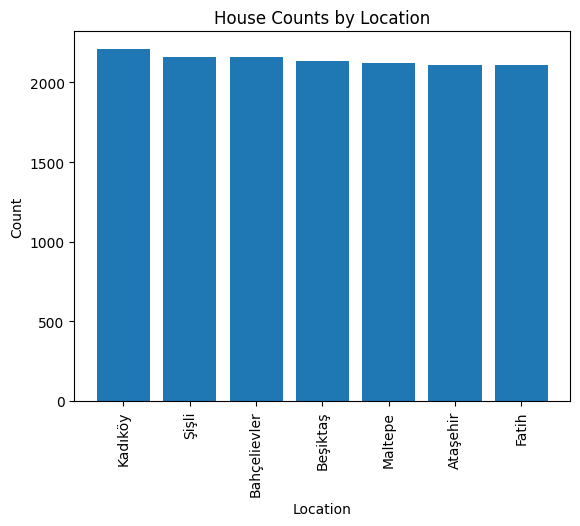

In [99]:
plt.bar(loc_stats.location,loc_stats["count"])
plt.xticks(rotation=90)
plt.xlabel("Location")
plt.ylabel("Count")
plt.title("House Counts by Location")
plt.show()

# <font color="#008080">Model Training</font>

In [100]:
df.location = df.location.str.lower()

In [101]:
df2 = pd.get_dummies(df, drop_first=True, prefix="", prefix_sep="")
df2.head()

,bath,balcony,price,total_squaremeter,room,living_room,bahçelievler,beşiktaş,fatih,kadıköy,maltepe,şişli
0,2,1,13544775,202.53,3,1,False,True,False,False,False,False
1,2,2,20342338,226.68,1,1,False,False,False,False,False,True
2,2,1,7550492,78.97,4,1,False,False,True,False,False,False
3,1,1,13241066,192.31,1,1,False,False,False,False,False,False
4,1,1,8103845,140.28,3,1,False,False,False,False,True,False


In [102]:
df2.shape

(15000, 12)

In [103]:
X = df2.drop(["price"],axis=1)
X.head(3)

,bath,balcony,total_squaremeter,room,living_room,bahçelievler,beşiktaş,fatih,kadıköy,maltepe,şişli
0,2,1,202.53,3,1,False,True,False,False,False,False
1,2,2,226.68,1,1,False,False,False,False,False,True
2,2,1,78.97,4,1,False,False,True,False,False,False


In [104]:
y = df2.price
y.head(3)

,price
0,13544775
1,20342338
2,7550492


## Searching for the best model

In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

def find_best_model(X,y):
  models = {
      "linear_regression": {
          "model": LinearRegression(),
          "params": {
              "fit_intercept": [True, False]
          }
      },
      "lasso": {
          "model": Lasso(),
          "params": {
              "alpha": [1,2],
              "selection": ["random", "cyclic"]
          }
      },
      "decision_tree": {
          "model": DecisionTreeRegressor(),
          "params": {
              "criterion": ["squared_error", "friedman_mse"],
              "splitter": ["best", "random"]
          }
      }
  }

  scores = []

  for model_name, config in models.items():
    gs = GridSearchCV(config["model"], config["params"], cv=5)
    gs.fit(X,y)
    scores.append({
        "model": model_name,
        "best_score": gs.best_score_
    })

  return f"Best model {scores[0]['model']}, best score {scores[0]['best_score']}"

find_best_model(X,y)

'Best model linear_regression, best score 0.8187903665270241'

In [106]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [109]:
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)

print(f"Train score: {lr_clf.score(X_train, y_train)}")
print(f"Test score: {lr_clf.score(X_test, y_test)}")

Train score: 0.8182512758738124
Test score: 0.8225970195151064


In [110]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr_clf, X_scaled, y, cv=5)
scores

array([0.81154817, 0.82200434, 0.81788738, 0.82054601, 0.82196593])

In [111]:
df2.head(3)

,bath,balcony,price,total_squaremeter,room,living_room,bahçelievler,beşiktaş,fatih,kadıköy,maltepe,şişli
0,2,1,13544775,202.53,3,1,False,True,False,False,False,False
1,2,2,20342338,226.68,1,1,False,False,False,False,False,True
2,2,1,7550492,78.97,4,1,False,False,True,False,False,False


# <font color="#008080">Deployment Preparation</font>

In [112]:
import pickle
with open("istanbul_housing_model.pickle","wb") as file:
  pickle.dump(lr_clf,file)

In [113]:
import json
cols = {
    "data_cols" : [col.lower() for col in X.columns]
}

with open("columns.json","w") as file:
  file.write(json.dumps(cols))

In [114]:
with open("istanbul_scaler.pickle", "wb") as file:
    pickle.dump(scaler, file)

In [115]:
sample_input = pd.DataFrame([{
    "bath": 2,
    "balcony": 1,
    "total_squaremeter": 120,
    "room": 3,
    "living_room": 1,
    "bahçelievler": False,
    "beşiktaş": False,
    "fatih": True,
    "kadıköy": False,
    "maltepe": False,
    "şişli": False
}])

sample_input_scaled = scaler.transform(sample_input)

lr_clf.predict(sample_input_scaled)

array([10673067.62874431])